In [1]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Generate Synthetic data

Text(0.5, 1.0, 'Syn2')

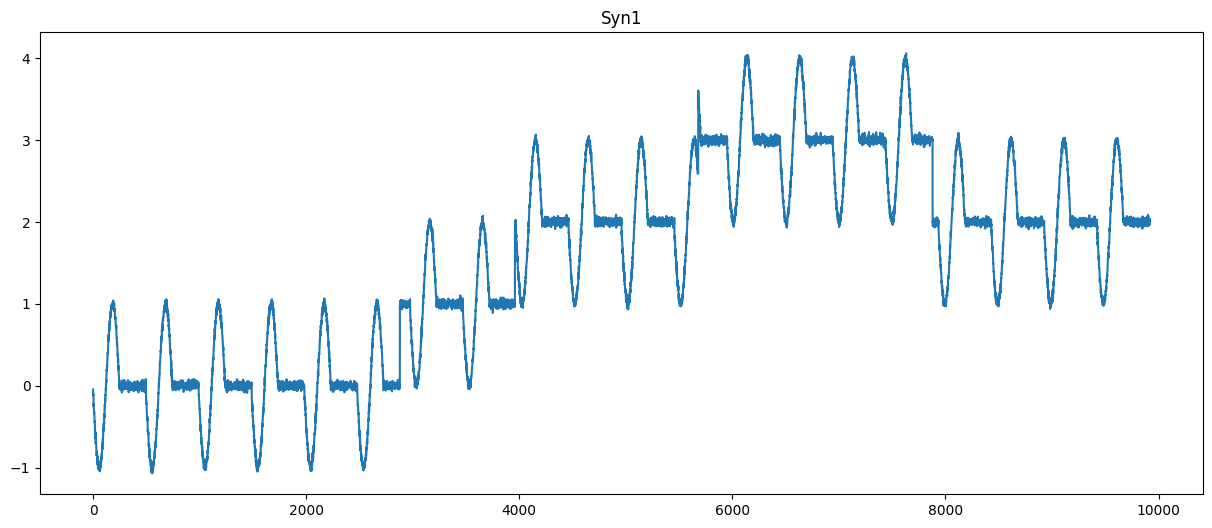

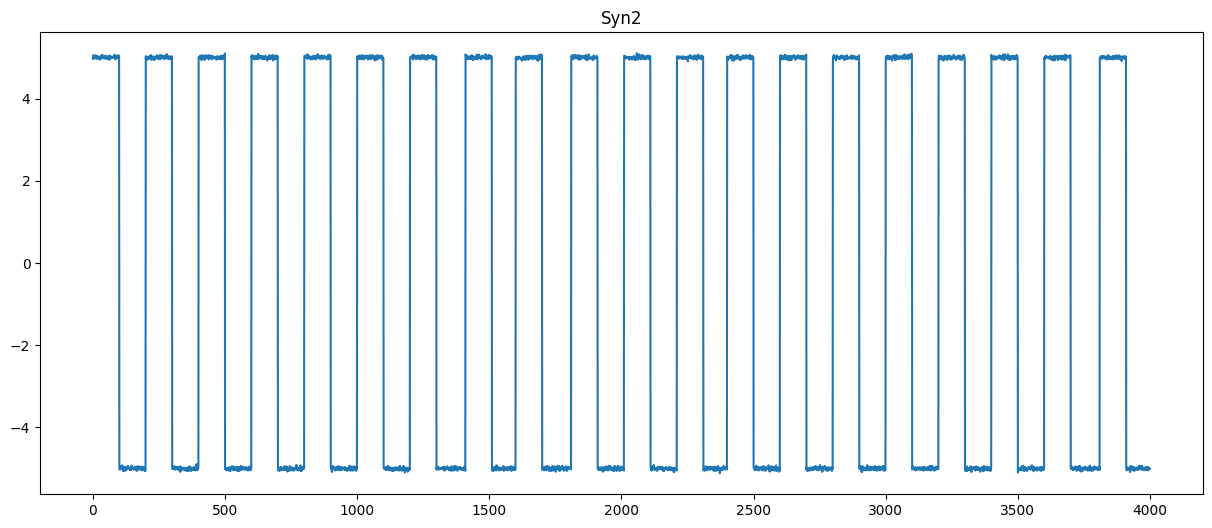

In [2]:
from generate_syn import generate_syn1, generate_syn2
generate_syn1('data/syn1.json')
generate_syn2('data/syn2.json')
with open('data/syn1.json') as f:
    syn1 = json.load(f)
index = np.arange(len(syn1['ts']))
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn1['ts'])
plt.title('Syn1')
with open('data/syn2.json') as f:
    syn2 = json.load(f)    
index = np.arange(len(syn2['ts']))
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn2['ts'])      
plt.title('Syn2')

## Run OneShotSTL

In [3]:
cmd = 'java -jar java/OneShotSTL/OneShotSTL.jar --method OneShotSTL --task decompose --shiftWindow 0 --in data/syn1.json --out result/syn1_OneShotSTL.json'
_ = os.system(cmd)
cmd = 'java -jar java/OneShotSTL/OneShotSTL.jar --method OneShotSTL --task decompose --shiftWindow 10 --in data/syn2.json --out result/syn2_OneShotSTL.json'
_ = os.system(cmd)

## Plot the result

Trend MAE: 0.044750498771039766
Seasonal MAE: 0.04082356995780002


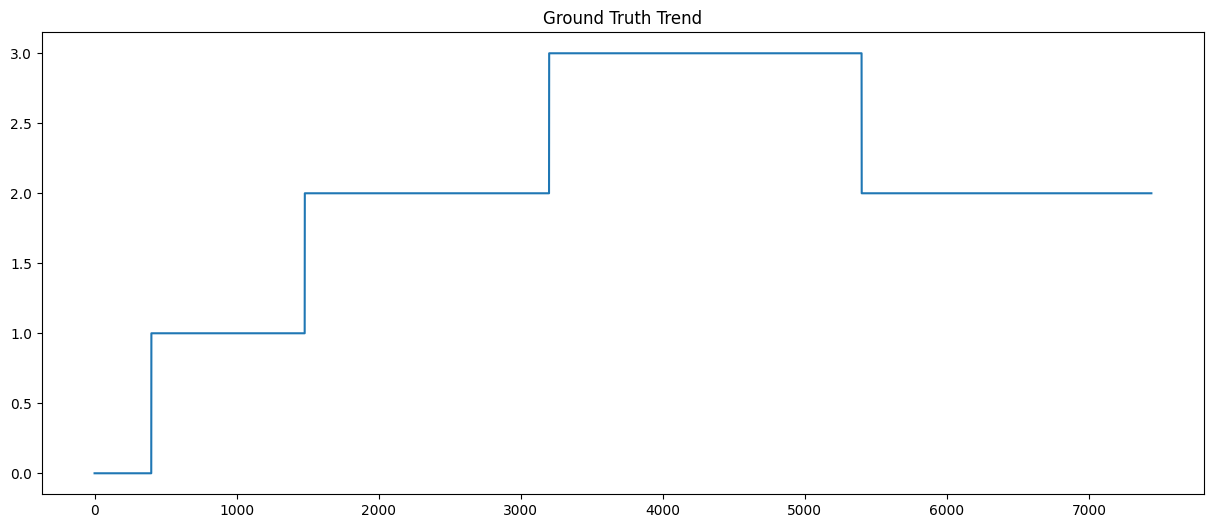

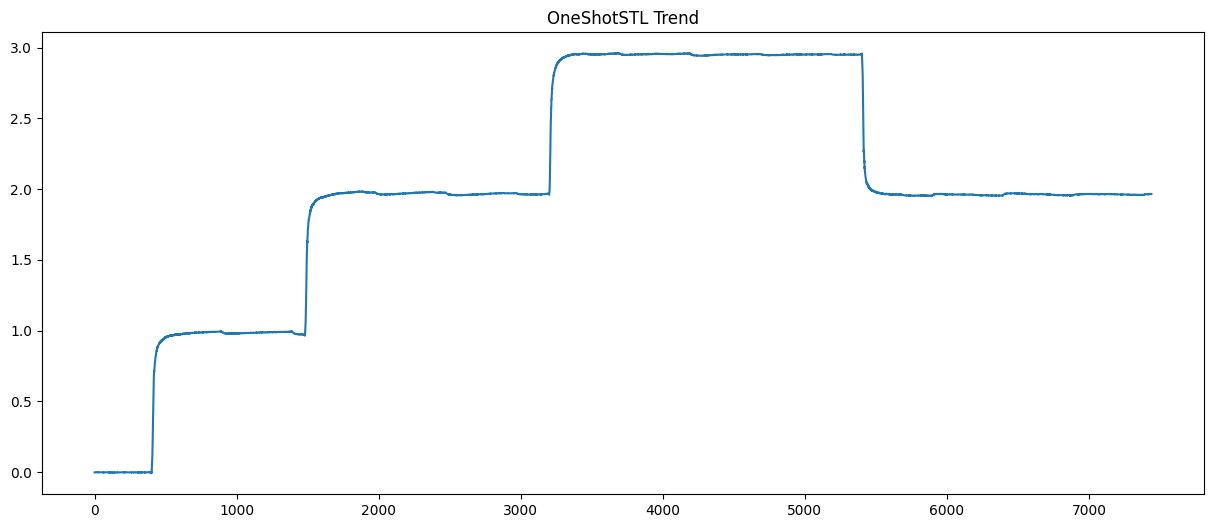

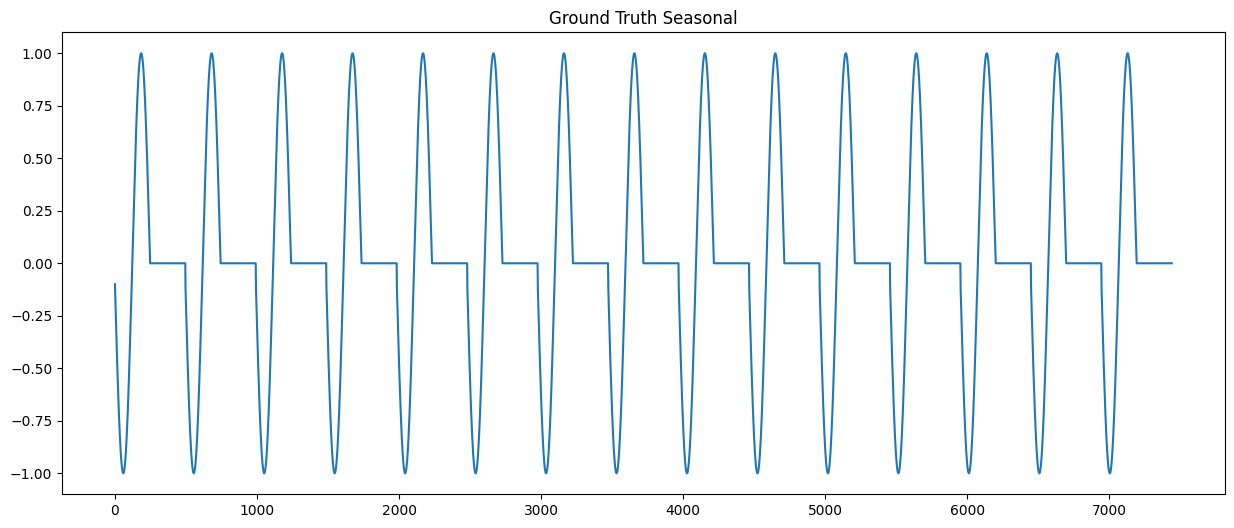

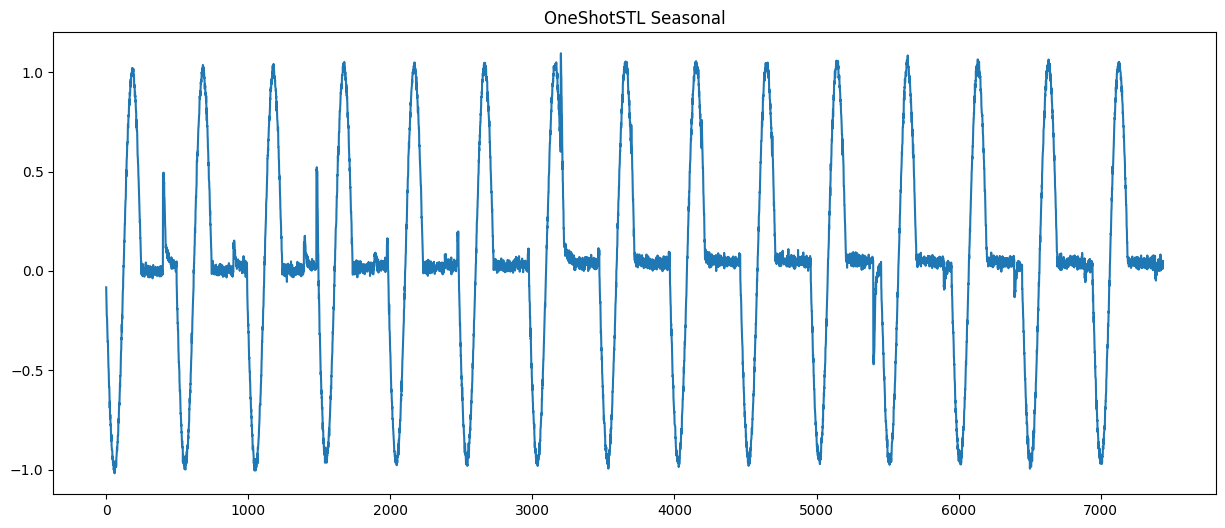

In [4]:
with open('result/syn1_OneShotSTL.json') as f:
    syn1_OneShotSTL = json.load(f)    
index = np.arange(len(syn1['trend']) - syn1['trainTestSplit'])
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn1['trend'][syn1['trainTestSplit']:]);
plt.title('Ground Truth Trend')
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn1_OneShotSTL['trend']);
plt.title('OneShotSTL Trend')
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn1['seasonal'][syn1['trainTestSplit']:]);
plt.title('Ground Truth Seasonal')
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn1_OneShotSTL['seasonal']);
plt.title('OneShotSTL Seasonal')

print('Trend MAE: {}'.format(np.mean(np.abs(np.array(syn1['trend'][syn1['trainTestSplit']:]) - np.array(syn1_OneShotSTL['trend'])))))
print('Seasonal MAE: {}'.format(np.mean(np.abs(np.array(syn1['seasonal'][syn1['trainTestSplit']:]) - np.array(syn1_OneShotSTL['seasonal'])))))


Trend MAE: 0.0015307663608086829
Seasonal MAE: 0.013667874893618882


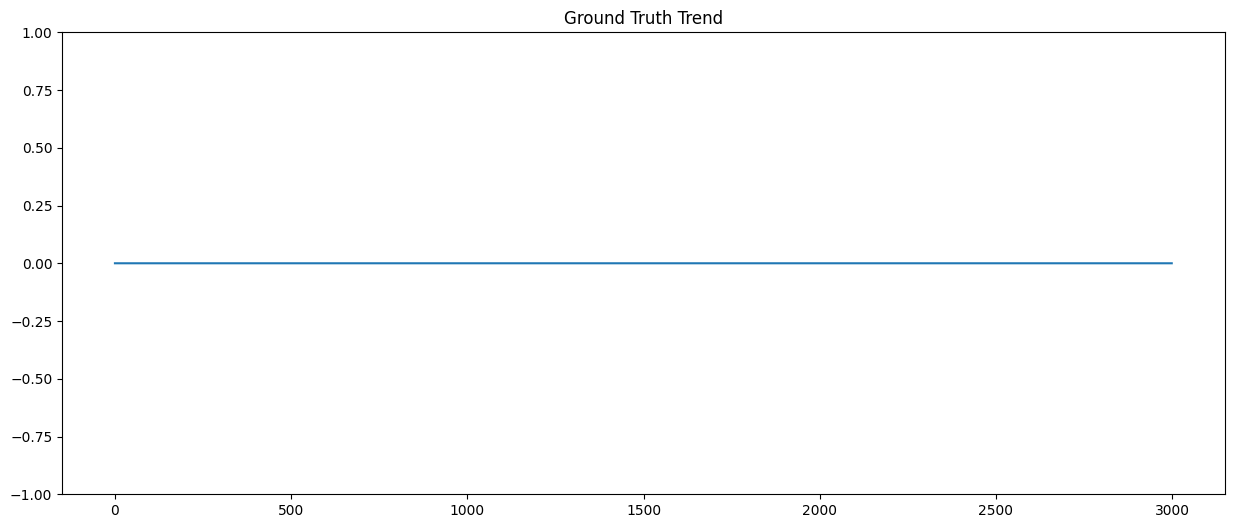

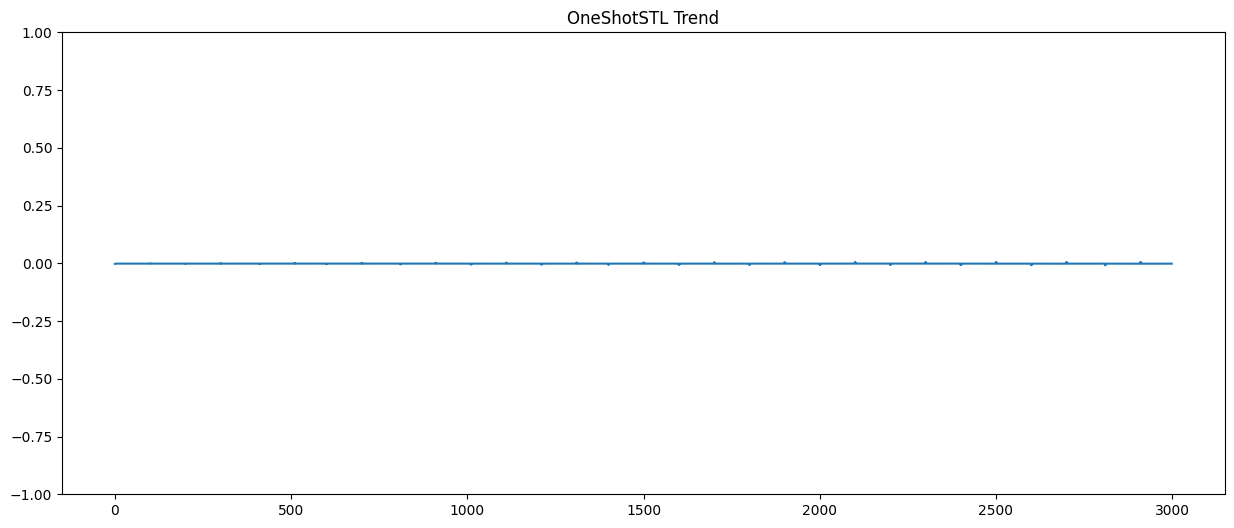

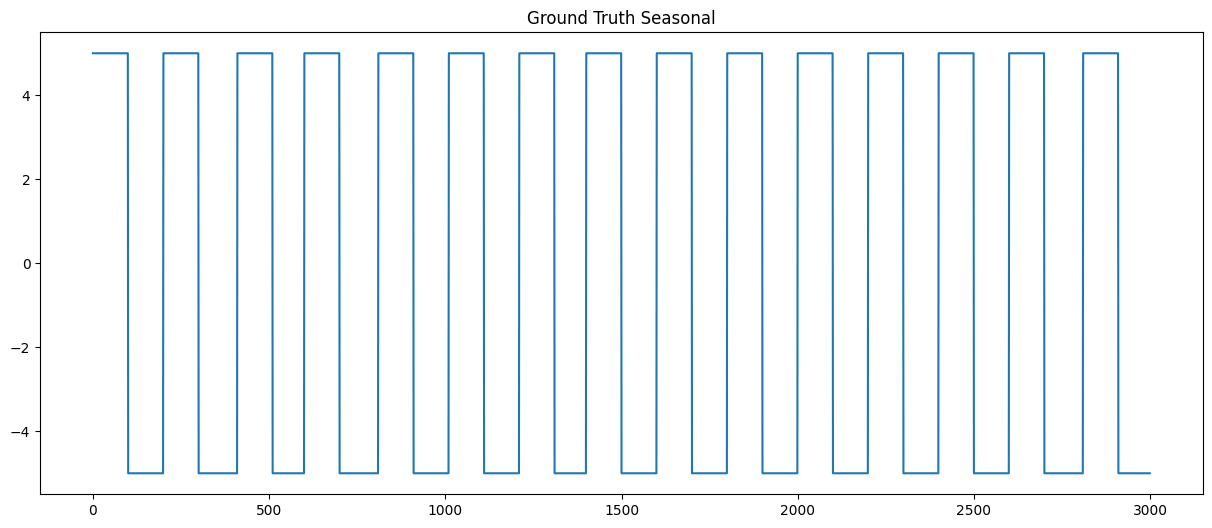

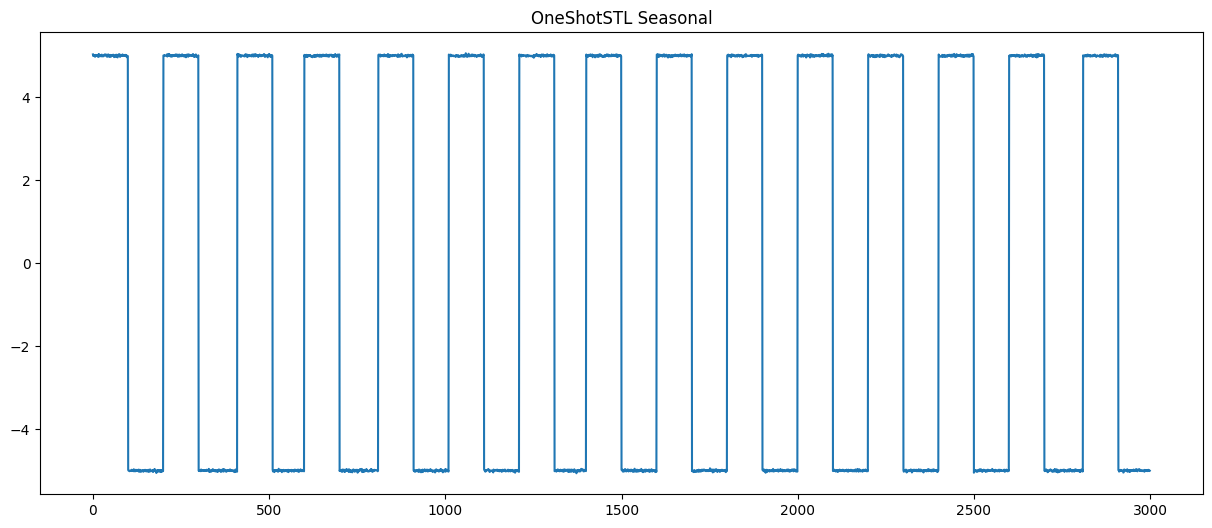

In [5]:
with open('result/syn2_OneShotSTL.json') as f:
    syn2_OneShotSTL = json.load(f)    
index = np.arange(len(syn2['trend']) - syn2['trainTestSplit'])
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn2['trend'][syn2['trainTestSplit']:]);
ax.set_ylim([-1, 1])
plt.title('Ground Truth Trend')
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn2_OneShotSTL['trend']);
ax.set_ylim([-1, 1])
plt.title('OneShotSTL Trend')
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn2['seasonal'][syn2['trainTestSplit']:]);
plt.title('Ground Truth Seasonal')
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index, syn2_OneShotSTL['seasonal']);
plt.title('OneShotSTL Seasonal')
print('Trend MAE: {}'.format(np.mean(np.abs(np.array(syn2['trend'][syn2['trainTestSplit']:]) - np.array(syn2_OneShotSTL['trend'])))))
print('Seasonal MAE: {}'.format(np.mean(np.abs(np.array(syn2['seasonal'][syn2['trainTestSplit']:]) - np.array(syn2_OneShotSTL['seasonal'])))))